---


# Midterm 3 - Assignment 1

---

## Training of autoencoders for the MNIST dataset

### Import libraries and dataset

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from sklearn.manifold import TSNE

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train_noisy = x_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\Mattia\Anaconda3\envs\TFtest\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Mattia\Anaconda3\envs\TFtest\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Mattia\Anaconda3\envs\TFtest\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Mattia\Anaconda3\envs\TFtest\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Mattia\Anaconda3\envs\TFtest\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Impossibile trovare il modulo specificato.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

### 1st: shallow AE, 16 neurons

In [0]:
encoding_dim = 16

input_img = Input(shape = (28*28,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(28*28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

#### Fit model and test

In [0]:
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

#### Plot losses

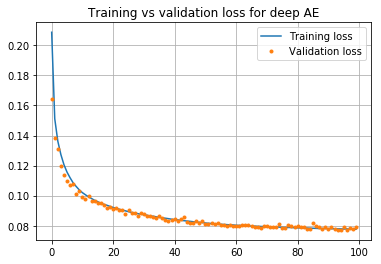

In [0]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot((history.history['val_loss']),'.', label = 'Validation loss')
plt.title('Training vs validation loss for shallow AE')
plt.grid()
plt.legend()
plt.show()

#### Make predictions

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

### 2nd try: deep AE, 128/64/32 neurons

In [0]:
h_dim = [128, 64, 32]

input_img = Input(shape=(28*28, ))
encoded = Dense(h_dim[0], activation='relu')(input_img)
encoded = Dense(h_dim[1], activation='relu')(encoded)
encoded = Dense(h_dim[2], activation='relu')(encoded)

decoded = Dense(h_dim[1], activation='relu')(encoded)
decoded = Dense(h_dim[0], activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

#### Fit model and test

In [0]:
history = autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

#### Plot losses

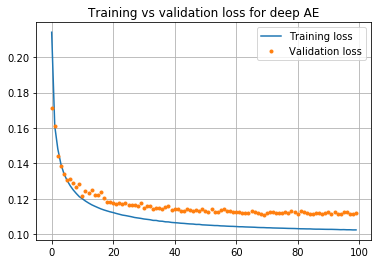

In [44]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot((history.history['val_loss']),'.', label = 'Validation loss')
plt.title('Training vs validation loss for deep AE')
plt.grid()
plt.legend()
plt.show()

####Reconstruct test set

In [0]:
decoded_imgs  = autoencoder.predict(x_test)

###3rd try: deep AE, 128/64/32/16/8 neurons, L1 regularized



In [0]:
h_dim = [128, 64, 32, 16, 8]
reg = regularizers.l1(1e-8)

input_img = Input(shape=(28*28, ))
encoded = Dense(h_dim[0], activation='relu', activity_regularizer = reg)(input_img)
encoded = Dense(h_dim[1], activation='relu', activity_regularizer = reg)(encoded)
encoded = Dense(h_dim[2], activation='relu', activity_regularizer = reg)(encoded)
encoded = Dense(h_dim[3], activation='relu', activity_regularizer = reg)(encoded)

encoded = Dense(h_dim[2], activation='relu', activity_regularizer = reg)(encoded)
decoded = Dense(h_dim[1], activation='relu', activity_regularizer = reg)(encoded)
decoded = Dense(h_dim[0], activation='relu', activity_regularizer = reg)(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

####Fit model and test

In [0]:
history = autoencoder.fit(x_train, x_train, epochs=200, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 54us/step - loss: 0.2352 - val_loss: 0.1890
Epoch 2/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.1758 - val_loss: 0.1642
Epoch 3/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.1610 - val_loss: 0.1568
Epoch 4/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.1531 - val_loss: 0.1488
Epoch 5/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.1471 - val_loss: 0.1432
Epoch 6/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.1429 - val_loss: 0.1435
Epoch 7/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.1393 - val_loss: 0.1398
Epoch 8/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.1358 - val_loss: 0.1344
Epoch 9/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.1331 - val_loss: 0.1

####Plot losses

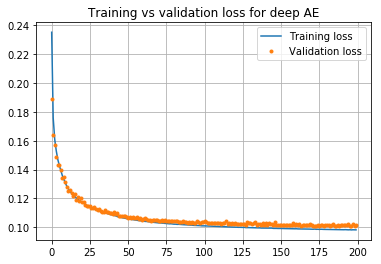

In [0]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot((history.history['val_loss']),'.', label = 'Validation loss')
plt.title('Training vs validation loss for deep AE')
plt.grid()
plt.legend()
plt.show()

####Make predictions

In [0]:
decoded_imgs  = autoencoder.predict(x_test)
#encoded_imgs = encoder.predict(x_test)

###Visualize predictions

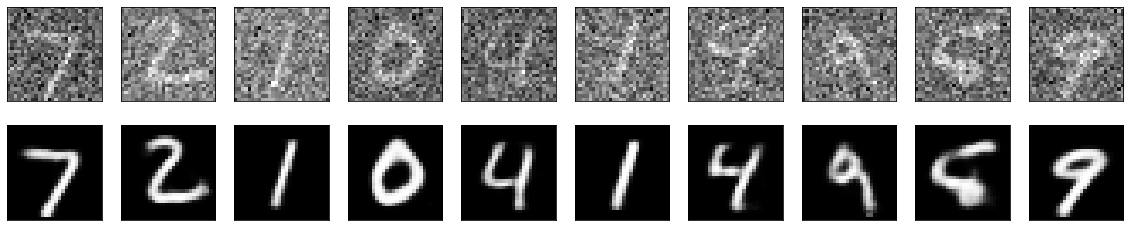

In [80]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

###Attach classifier to deep AE to classify dataset

In [0]:
encoded.trainable = False
classifier = Dense(10, activation = 'softmax')(encoded)

Classifier = Model(input_img, classifier)

Classifier.compile(optimizers.Nadam(lr = 2e-4), 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])


####Fit classifier

In [140]:
history_classifier = Classifier.fit(x_train, y_train,epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/step - loss: 2.4858 - acc: 0.4791 - val_loss: 0.7118 - val_acc: 0.7632
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.5200 - acc: 0.8331 - val_loss: 0.3859 - val_acc: 0.8792
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.3313 - acc: 0.8985 - val_loss: 0.2815 - val_acc: 0.9162
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2571 - acc: 0.9221 - val_loss: 0.2316 - val_acc: 0.9318
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2157 - acc: 0.9347 - val_loss: 0.1988 - val_acc: 0.9392
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1882 - acc: 0.9442 - val_loss: 0.1748 - val_acc: 0.9461
Epoch 7/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1675 - acc: 0.9494 - val_loss: 0.1591 - val_acc

####*Just in case* plot classifier performance

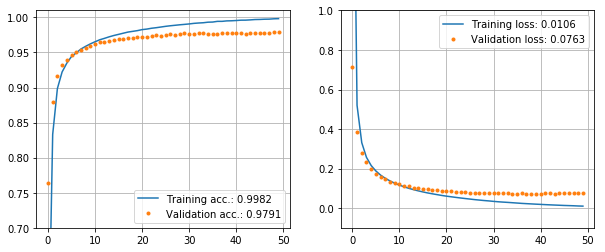

In [146]:
fig, (acc, loss) = plt.subplots(2,1)
fig.set_size_inches(4, 10, forward=True)

acc.plot(history_classifier.history['acc'], label = 'Training acc.: %.4f' %history_classifier.history['acc'][-1])
acc.plot((history_classifier.history['val_acc']),'.', label = 'Validation acc.: %.4f' %history_classifier.history['val_acc'][-1])
acc.grid()
acc.set_ylim((0.7,1.01))
acc.legend()

loss.plot(history_classifier.history['loss'], label = 'Training loss: %.4f' %history_classifier.history['loss'][-1])
loss.plot((history_classifier.history['val_loss']),'.', label = 'Validation loss: %.4f' %history_classifier.history['val_loss'][-1])
loss.grid()
loss.set_ylim((-0.099,1.0))
loss.legend()

plt.show()

####Predict labels

In [0]:
encoded_label = Classifier.predict(x_test)

###Encode test images and visualize data with t-SNE

In [0]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

In [0]:
X_embedded = TSNE(n_components = 2, perplexity = 30, learning_rate = 50).fit_transform(encoded_imgs)

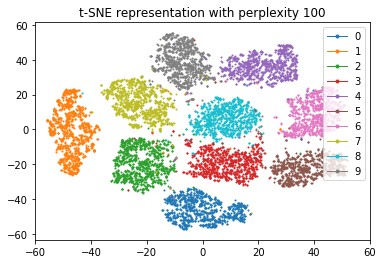

In [150]:
col = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:grey']
custom_legend = [Line2D([0], [0], color=col[0], marker = '.', lw=1),
                Line2D([0], [0], color=col[1], marker = '.', lw=1),
                Line2D([0], [0], color=col[2], marker = '.', lw=1),
                Line2D([0], [0], color=col[3], marker = '.', lw=1),
                Line2D([0], [0], color=col[4], marker = '.', lw=1),
                Line2D([0], [0], color=col[5], marker = '.', lw=1),
                Line2D([0], [0], color=col[6], marker = '.', lw=1),
                Line2D([0], [0], color=col[7], marker = '.', lw=1),
                Line2D([0], [0], color=col[8], marker = '.', lw=1),
                Line2D([0], [0], color=col[9], marker = '.', lw=1),]

for i in range(len(X_embedded)):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], c = col[np.argmax(encoded_label[i])], s = 1)
    
plt.xlim((-60,60))
plt.title('t-SNE representation with perplexity 100')
plt.legend(custom_legend, ['0', '1', '2','3', '4', '5', '6', '7', '8', '9'])
plt.show()

###Test AE with random noise

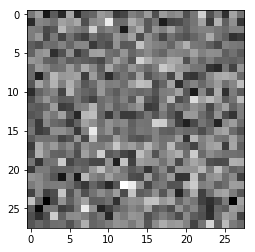

In [170]:
x_noisy = np.random.normal(loc=0.0, scale=2.0, size=(1,28*28))

plt.imshow(x_noisy.reshape(28, 28))

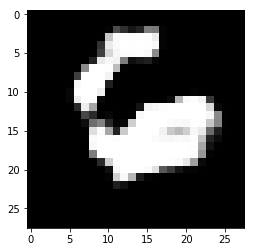

In [171]:
x = x_noisy
for i in range(3):
    x = autoencoder.predict(x)

plt.imshow(x.reshape(28, 28))